In [85]:
import nfl_data_py as nfl
import pandas as pd
import numpy as np

In [14]:
df = nfl.import_ftn_data([2022,2023], columns=None, downcast=True, thread_requests=False)



Downcasting floats.


In [15]:
df.columns

Index(['ftn_game_id', 'nflverse_game_id', 'season', 'week', 'ftn_play_id',
       'nflverse_play_id', 'starting_hash', 'qb_location',
       'n_offense_backfield', 'n_defense_box', 'is_no_huddle', 'is_motion',
       'is_play_action', 'is_screen_pass', 'is_rpo', 'is_trick_play',
       'is_qb_out_of_pocket', 'is_interception_worthy', 'is_throw_away',
       'read_thrown', 'is_catchable_ball', 'is_contested_ball',
       'is_created_reception', 'is_drop', 'is_qb_sneak', 'n_blitzers',
       'n_pass_rushers', 'is_qb_fault_sack', 'date_pulled'],
      dtype='object')

In [41]:
df['n_blitzers'].unique()

array([0, 1, 3, 2, 6, 4, 5], dtype=int32)

In [17]:
df = df[df['qb_location']!='0']
# df

In [18]:
df = df[['nflverse_game_id','nflverse_play_id','n_defense_box','n_blitzers']] #.to_pickle('2022_2023_defender_data.pkl')



In [8]:
df_nfl = pd.read_pickle('2013-2023_plays.pkl')


In [47]:
df

,nflverse_game_id,nflverse_play_id,n_defense_box,n_blitzers
0,2022_01_BUF_LA,56,6,0
1,2022_01_BUF_LA,80,6,0
2,2022_01_BUF_LA,101,7,0
3,2022_01_BUF_LA,122,6,1
4,2022_01_BUF_LA,146,6,0
...,...,...,...,...
48220,2023_22_SF_KC,4759,6,0
48221,2023_22_SF_KC,4791,6,0
48222,2023_22_SF_KC,4813,6,0
48223,2023_22_SF_KC,4835,6,0


In [124]:
df_all = pd.merge(df_nfl,df,left_on=['play_id','game_id'],right_on=['nflverse_play_id','nflverse_game_id'],how='inner')

In [125]:
for column in df_all.columns:
    print(column)

play_id
game_id
old_game_id
home_team
away_team
season_type
week
posteam
posteam_type
defteam
side_of_field
yardline_100
game_date
quarter_seconds_remaining
half_seconds_remaining
game_seconds_remaining
game_half
quarter_end
drive
sp
qtr
down
goal_to_go
time
yrdln
ydstogo
ydsnet
desc
play_type
yards_gained
shotgun
no_huddle
qb_dropback
qb_kneel
qb_spike
qb_scramble
pass_length
pass_location
air_yards
yards_after_catch
run_location
run_gap
field_goal_result
kick_distance
extra_point_result
two_point_conv_result
home_timeouts_remaining
away_timeouts_remaining
timeout
timeout_team
td_team
td_player_name
td_player_id
posteam_timeouts_remaining
defteam_timeouts_remaining
total_home_score
total_away_score
posteam_score
defteam_score
score_differential
posteam_score_post
defteam_score_post
score_differential_post
no_score_prob
opp_fg_prob
opp_safety_prob
opp_td_prob
fg_prob
safety_prob
td_prob
extra_point_prob
two_point_conversion_prob
ep
epa
total_home_epa
total_away_epa
total_home_rush_epa


In [126]:
keep = ['yardline_100','down', 'goal_to_go','yards_gained','play_type','success','epa','n_defense_box','n_blitzers','ydstogo'
]

In [127]:
df_all = df_all[keep]

In [128]:
df_run_pass = df_all[df_all['play_type'].isin(['run','pass'])].dropna()

In [129]:
df_run_pass.to_csv('df_run_pass.csv')

In [130]:
df_run_pass

,yardline_100,down,goal_to_go,yards_gained,play_type,success,epa,n_defense_box,n_blitzers,ydstogo
0,78.0,1.0,0,19.0,run,1.0,1.468819,6,0,10.0
1,59.0,1.0,0,0.0,pass,0.0,-0.492192,6,0,10.0
2,59.0,2.0,0,5.0,run,0.0,-0.325931,6,0,10.0
3,54.0,3.0,0,0.0,pass,0.0,-2.402200,6,0,5.0
5,72.0,1.0,0,4.0,pass,1.0,0.075127,7,0,10.0
...,...,...,...,...,...,...,...,...,...,...
78598,37.0,2.0,0,5.0,pass,1.0,0.552538,6,0,6.0
78599,32.0,3.0,0,19.0,run,1.0,1.728891,6,0,1.0
78600,13.0,1.0,0,3.0,run,0.0,-0.330699,6,0,10.0
78601,10.0,2.0,0,7.0,pass,0.0,-0.637115,6,0,7.0


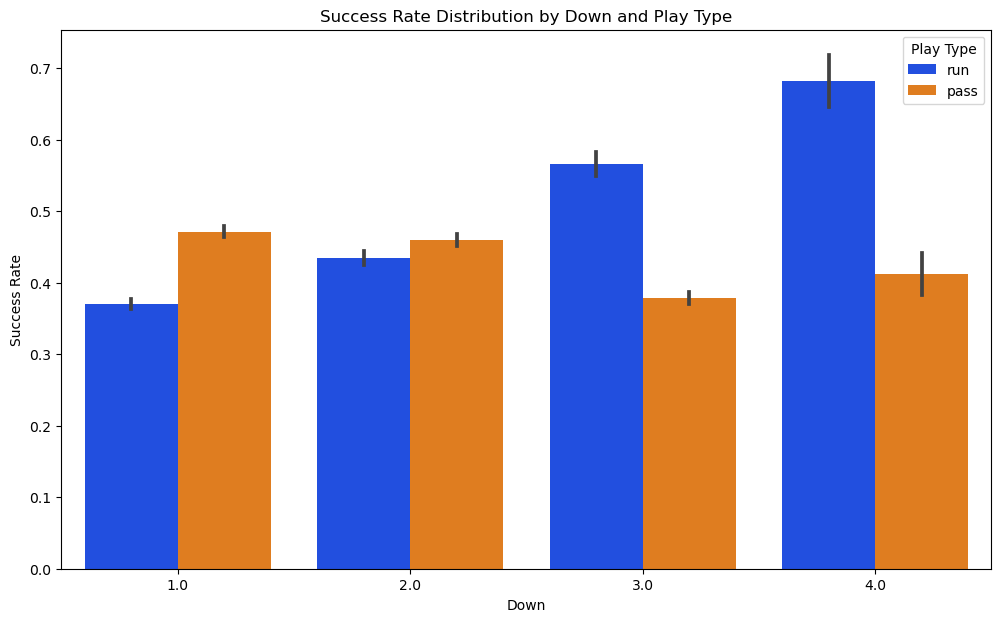

In [131]:
import seaborn as sns
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 7))

sns.barplot(data=df_run_pass, x='down', y='success', hue='play_type', ax=ax, palette='bright')
ax.set_title('Success Rate Distribution by Down and Play Type')
ax.set_xlabel('Down')
ax.set_ylabel('Success Rate')

plt.legend(title='Play Type')
plt.show()

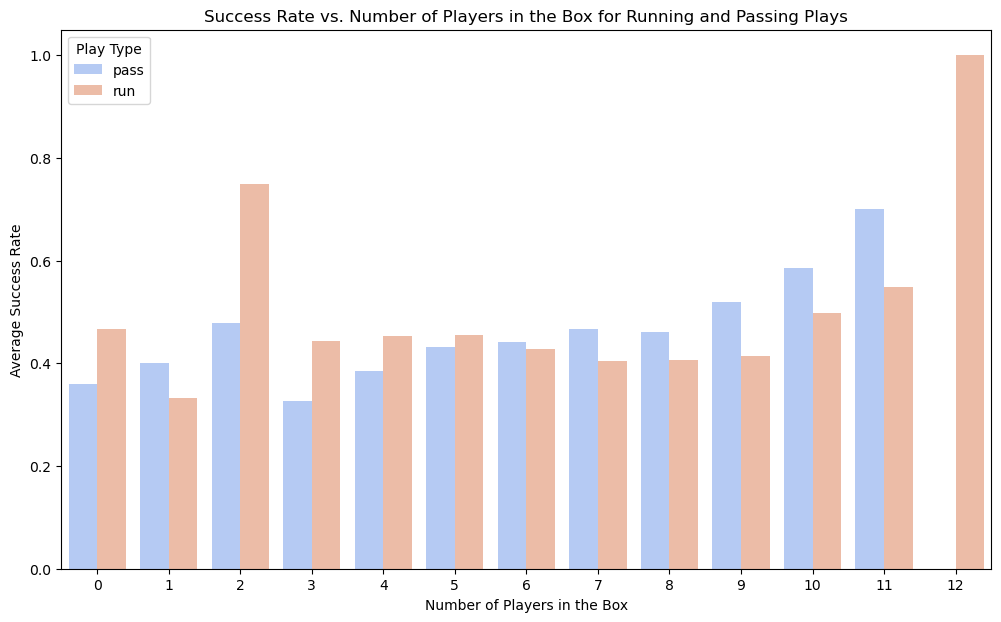

In [132]:
# Creating a bar plot to show the success rate of running and passing plays versus the number of players in the box
fig, ax = plt.subplots(figsize=(12, 7))

grouped_data = df_run_pass.groupby(['play_type', 'n_defense_box']).agg({'success': 'mean'}).reset_index()

# Using a barplot to show the success rate for each play type as a function of the number of defenders in the box
sns.barplot(data=grouped_data, x='n_defense_box', y='success', hue='play_type', ax=ax, palette='coolwarm')
ax.set_title('Success Rate vs. Number of Players in the Box for Running and Passing Plays')
ax.set_xlabel('Number of Players in the Box')
ax.set_ylabel('Average Success Rate')

plt.legend(title='Play Type')
plt.show()


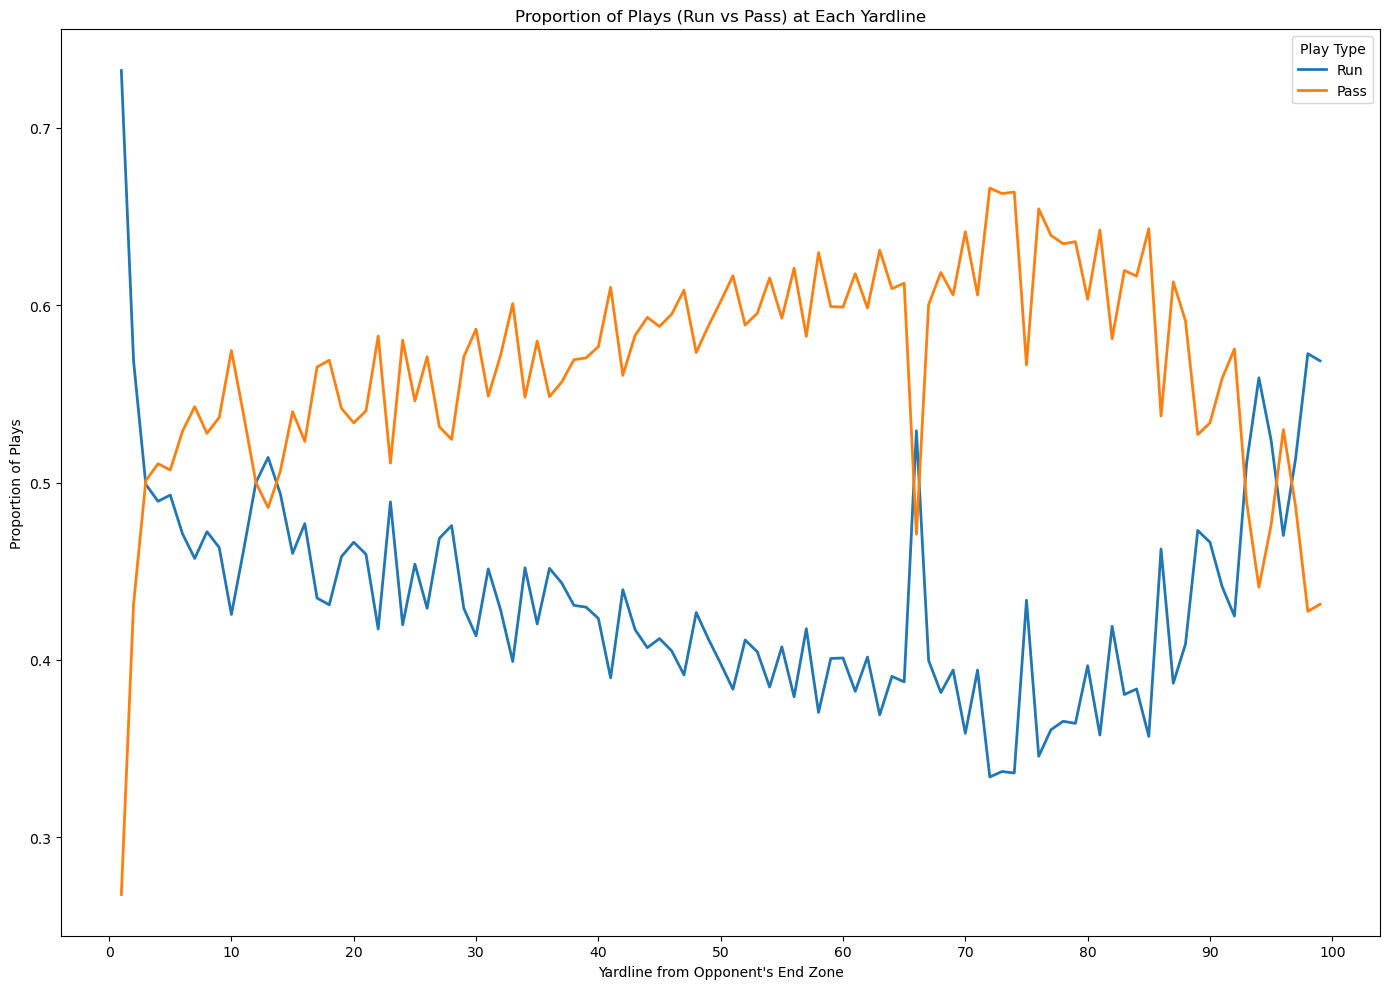

In [133]:
# Creating a figure with subplots for cleaner visualization
fig, axes = plt.subplots(figsize=(14, 10), sharex=True)
prop_data = df_run_pass.groupby(['yardline_100', 'play_type']).size().unstack().fillna(0)
prop_data['total'] = prop_data.sum(axis=1)
prop_data['run_prop'] = prop_data['run'] / prop_data['total']
prop_data['pass_prop'] = prop_data['pass'] / prop_data['total']
# Smoother line plot for proportion of plays
prop_data[['run_prop','pass_prop']].plot(kind='line', ax=axes, color=['#1f77b4', '#ff7f0e'], linewidth=2)
axes.set_title('Proportion of Plays (Run vs Pass) at Each Yardline')
axes.set_ylabel('Proportion of Plays')
axes.set_xlabel('Yardline from Opponent\'s End Zone')
axes.set_xticks(range(0, 101, 10))  # Setting ticks every 10 yards
axes.set_xticklabels(range(0, 101, 10))
axes.legend(title='Play Type', labels=['Run', 'Pass'])

# # Smoother line plot for success rates
# success_data = df_run_pass.groupby(['yardline_100', 'play_type'])['success'].mean().unstack()

# success_data.plot(kind='line', ax=axes[1], color=['#1f77b4', '#ff7f0e'], linewidth=2)
# axes[1].set_title('Success Rates of Run vs Pass Plays at Each Yardline')
# axes[1].set_ylabel('Success Rate')
# axes[1].set_xlabel('Yardline from Opponent\'s End Zone')
# axes[1].legend(title='Play Type', labels=['Run', 'Pass'])

# # for ax in axes:
# #     ax.set_xticks(range(0, 101, 10))  # Setting ticks every 10 yards
# #     ax.set_xticklabels(range(0, 101, 10))  # Labeling ticks every 10 yards


plt.tight_layout()
plt.show()


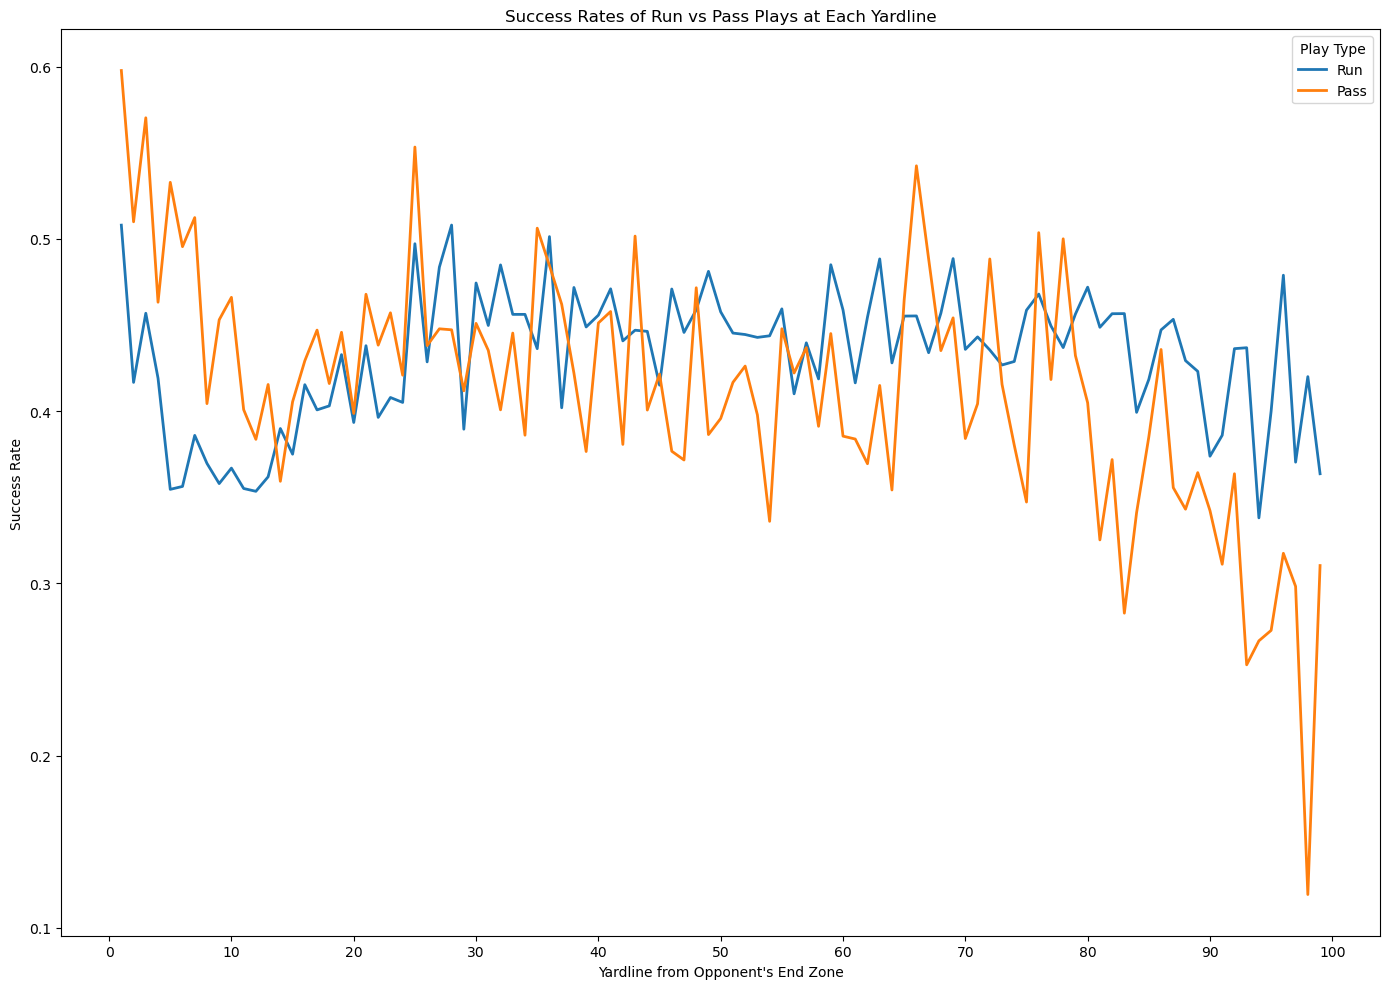

In [134]:
# Creating a figure with subplots for cleaner visualization
fig, axes = plt.subplots(figsize=(14, 10), sharex=True)
# prop_data = df_run_pass.groupby(['yardline_100', 'play_type']).size().unstack()
# prop_data = prop_data.div(prop_data.sum(axis=1), axis=0)
# # Smoother line plot for proportion of plays
# prop_data.plot(kind='line', ax=axes, color=['#1f77b4', '#ff7f0e'], linewidth=2)
# axes.set_title('Proportion of Plays (Run vs Pass) at Each Yardline')
# axes.set_ylabel('Proportion of Plays')
# axes.set_xlabel('Yardline from Opponent\'s End Zone')
# axes.set_xticks(range(0, 101, 10))  # Setting ticks every 10 yards
# axes.set_xticklabels(range(0, 101, 10))
# axes.legend(title='Play Type', labels=['Run', 'Pass'])

# Smoother line plot for success rates
success_data = df_run_pass.groupby(['yardline_100', 'play_type'])['success'].mean().unstack()


success_data.plot(kind='line', ax=axes, color=['#1f77b4', '#ff7f0e'], linewidth=2)
axes.set_title('Success Rates of Run vs Pass Plays at Each Yardline')
axes.set_ylabel('Success Rate')
axes.set_xlabel('Yardline from Opponent\'s End Zone')
axes.legend(title='Play Type', labels=['Run', 'Pass'])
axes.set_xticks(range(0, 101, 10))  # Setting ticks every 10 yards
axes.set_xticklabels(range(0, 101, 10))



# for ax in axes:
#     ax.set_xticks(range(0, 101, 10))  # Setting ticks every 10 yards
#     ax.set_xticklabels(range(0, 101, 10))  # Labeling ticks every 10 yards


plt.tight_layout()
plt.show()


In [135]:
df_run_pass[df_run_pass['yardline_100']==1]['play_type'].value_counts()

play_type
run     517
pass    189
Name: count, dtype: int64

In [137]:
df_run_pass['is_pass'] = np.where(df_run_pass['play_type']=='run',0,1)

In [145]:
df_run_pass_4th = df_run_pass[df_run_pass['down']==4]
df_run_pass_4th

,yardline_100,down,goal_to_go,yards_gained,play_type,success,epa,n_defense_box,n_blitzers,ydstogo,is_pass
126,28.0,4.0,0,7.0,pass,1.0,2.097658,7,1,1.0,1
131,14.0,4.0,0,4.0,pass,1.0,2.139485,5,0,3.0,1
135,6.0,4.0,1,0.0,pass,0.0,-2.789325,6,0,6.0,1
149,22.0,4.0,0,19.0,pass,1.0,3.545995,5,0,15.0,1
205,28.0,4.0,0,3.0,pass,1.0,2.028536,6,0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...
78334,66.0,4.0,0,21.0,run,1.0,3.294998,8,0,1.0,0
78363,13.0,4.0,0,0.0,run,0.0,-3.642313,10,0,1.0,0
78429,82.0,4.0,0,6.0,pass,1.0,2.473923,6,0,3.0,1
78546,15.0,4.0,0,4.0,pass,1.0,2.397201,6,0,3.0,1


In [173]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

X = df_run_pass_4th[['yardline_100','ydstogo','goal_to_go','is_pass','n_defense_box']]
y = df_run_pass_4th['success']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initializing and training the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predicting on the test set
y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

accuracy


0.6708595387840671

In [181]:
test = np.array([[28, 1, 0,1, 6]])
print(model.predict(test))
predicted_probabilities = model.predict_proba(test)

print("Probability of class 0:", predicted_probabilities[0][0])
print("Probability of class 1:", predicted_probabilities[0][1])

[1.]
Probability of class 0: 0.4525070150512407
Probability of class 1: 0.5474929849487593


/Users/ilanb/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/Users/ilanb/anaconda3/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


yardline_100     55.0
goal_to_go        0.0
is_pass           0.0
n_defense_box     6.0
Name: 23154, dtype: float64